In [1]:
import os
import pandas as pd
df = pd.read_csv("Sonar_Mines_Rocks.csv")

In [2]:
# 특징과 라벨 분리
X = df.drop('Y', axis = 1)
Y = df['Y']

In [3]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [4]:
# Band4의 왜도가 가장 큼 => 어떻게 분포되어 있는지 확인해보자
Train_X.skew() 

Band1     2.030526
Band2     1.975223
Band3     2.597772
Band4     3.519814
Band5     2.117638
Band6     1.316527
Band7     1.182681
Band8     1.456795
Band9     1.550361
Band10    1.238541
Band11    0.926722
Band12    0.523671
Band13    0.669469
Band14    1.109024
Band15    0.801853
Band16    0.709791
Band17    0.709770
Band18    0.518228
Band19    0.314905
Band20   -0.114302
Band21   -0.345601
Band22   -0.400898
Band23   -0.598068
Band24   -0.636171
Band25   -0.658681
Band26   -0.590409
Band27   -0.529494
Band28   -0.588414
Band29   -0.452756
Band30   -0.170138
Band31    0.189258
Band32    0.201537
Band33    0.378510
Band34    0.451211
Band35    0.464435
Band36    0.564456
Band37    0.612379
Band38    0.936028
Band39    0.855393
Band40    0.739789
Band41    0.828360
Band42    0.738055
Band43    0.794670
Band44    1.151933
Band45    1.195313
Band46    1.565330
Band47    1.810005
Band48    1.324964
Band49    1.257787
Band50    1.827311
Band51    2.850472
Band52    2.130298
Band53    1.

<AxesSubplot:>

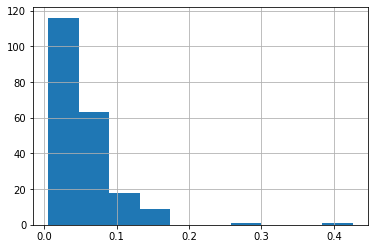

In [5]:
# 한쪽으로 많이 치우쳐 있다
%matplotlib inline
df['Band4'].hist()

In [6]:
# 치우침을 제거했을 때의 성능 비교를 위한 모델 개발

# 라벨 숫자로 바꾸기
Train_Y.replace({"M":-1, "R":1}, inplace = True)
Test_Y.replace({"M":-1, "R":1}, inplace = True)

In [7]:
# 원본 데이터로 모델링
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier as MLP
model = MLP(random_state = 42, max_iter = 700).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.9019607843137256


c:\users\jaehwan\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
# 왜도 기반 치우친 변수 제거 
import numpy as np
# 왜도의 절대값이 1.5 이상인 컬럼만 가져오기
biased_variables = Train_X.columns[Train_X.skew().abs() > 1.5] 

In [9]:
# 치우침 제거
Train_X[biased_variables] = Train_X[biased_variables] - Train_X[biased_variables].min() + 1
Train_X[biased_variables] = np.log10(Train_X[biased_variables])

c:\users\jaehwan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
# 치우침 제거 후 모델 평가
model = MLP(random_state = 42, max_iter = 700).fit(Train_X, Train_Y)

# 테스트도 데이터도 같은 방법으로 전처리를 수행
Test_X[biased_variables] = Test_X[biased_variables] - Test_X[biased_variables].min() + 1
Test_X[biased_variables] = Test_X[biased_variables].apply(np.log)

pred_Y = model.predict(Test_X)
score = f1_score(Test_Y, pred_Y)
print(score)

0.8260869565217392


c:\users\jaehwan\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\jaehwan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
